In [41]:
import sklearn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("ACC_minute.csv")
data.head()


,date,open,high,low,close,volume
0,2015-02-02 09:15:00,1554.90,1556.70,1544.80,1549.60,1441
1,2015-02-02 09:16:00,1550.70,1551.30,1546.50,1548.30,424
2,2015-02-02 09:17:00,1548.35,1549.00,1545.15,1547.55,831
3,2015-02-02 09:18:00,1547.55,1547.55,1543.00,1544.20,1297
4,2015-02-02 09:19:00,1544.25,1547.75,1544.25,1547.75,255


In [ ]:
#data loading and preparation
from sklearn.model_selection import train_test_split
import numpy as np
x = np.array(data['high']).reshape(-1, 1)
y = np.array(data['low']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)


In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X_train,y_train)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

print(f"mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"coefficient of determination:{r2_score(y_test,y_pred):.2f}")


mean squared error: 4.53
coefficient of determination:1.00


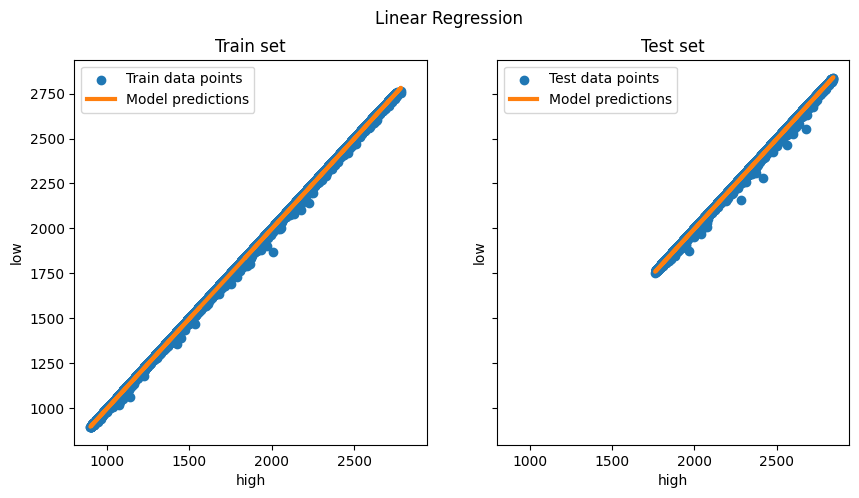

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="high", ylabel="low", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="high", ylabel="low", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()